In [0]:
# Generate data for optimal advertising problem.
import numpy as np
np.random.seed(1)
m = 5
n = 24
SCALE = 10000
B = np.random.lognormal(mean=8, size=(m,1)) + 10000
B = 1000*np.round(B/1000)

P_ad = np.random.uniform(size=(m,1))
P_time = np.random.uniform(size=(1,n))
P = P_ad.dot(P_time)

T = np.sin(np.linspace(-2*np.pi/2,2*np.pi  -2*np.pi/2,n))*SCALE
T += -np.min(T) + SCALE
c = np.random.uniform(size=(m,1))
c *= 0.6*T.sum()/c.sum()
c = 1000*np.round(c/1000)
R = np.array([np.random.lognormal(c.min()/c[i]) for i in range(m)])

In [0]:
# Form and solve the optimal advertising problem.
from cvxpy import *
D = Variable((m,n))
Si = [minimum(R[i]*P[i,:]*D[i,:].T, B[i]) for i in range(m)]
prob = Problem(Maximize(sum(Si)),
               [D >= 0,
                D.T*np.ones(m) <= T,
                D*np.ones((n,1)) >= c])
prob.solve()

42866.00552080694

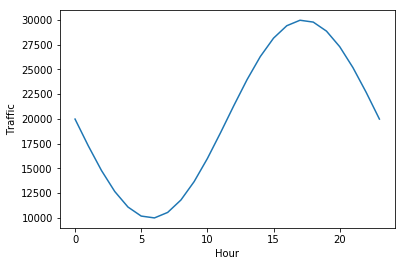

In [0]:
# Plot traffic.
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(T)
plt.xlabel('Hour')
plt.ylabel("Traffic")
plt.show()

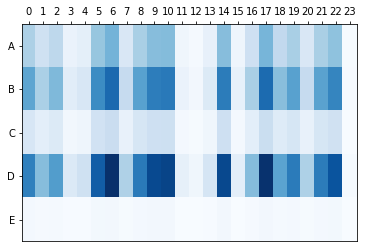

In [0]:
# Plot P.
column_labels = range(0,24)
row_labels = list('ABCDE')
fig, ax = plt.subplots()
data = D.value
heatmap = ax.pcolor(P, cmap=plt.cm.Blues)

# put the major ticks at the middle of each cell
ax.set_xticks(np.arange(P.shape[1])+0.5, minor=False)
ax.set_yticks(np.arange(P.shape[0])+0.5, minor=False)

# want a more natural, table-like display
ax.invert_yaxis()
ax.xaxis.tick_top()

ax.set_xticklabels(column_labels, minor=False)
ax.set_yticklabels(row_labels, minor=False)
plt.show()

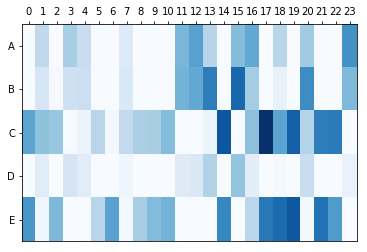

In [0]:
# Plot optimal D.
import matplotlib.pyplot as plt
%matplotlib inline
column_labels = range(0,24)
row_labels = list('ABCDE')
fig, ax = plt.subplots()
data = D.value
heatmap = ax.pcolor(data, cmap=plt.cm.Blues)

# put the major ticks at the middle of each cell
ax.set_xticks(np.arange(data.shape[1])+0.5, minor=False)
ax.set_yticks(np.arange(data.shape[0])+0.5, minor=False)

# want a more natural, table-like display
ax.invert_yaxis()
ax.xaxis.tick_top()

ax.set_xticklabels(column_labels, minor=False)
ax.set_yticklabels(row_labels, minor=False)
plt.savefig('ad_opt')
plt.show()